In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read data from CSV file

file_link = 'https://drive.google.com/file/d/1pE9YLv0JoHXB8adrDPRnEhipaSv68bap/view'
id = file_link.split("/")[-2]
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

In [ ]:
df.shape

(1199, 14)

In [ ]:
df.isnull().sum()

,0
person_age,1
person_gender,7
person_education,17
person_income,17
person_emp_exp,4
person_home_ownership,4
loan_amnt,11
loan_intent,26
loan_int_rate,9
loan_percent_income,12


In [ ]:
#Handling Null Values

df = df.dropna()

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


<Axes: xlabel='person_income', ylabel='credit_score'>

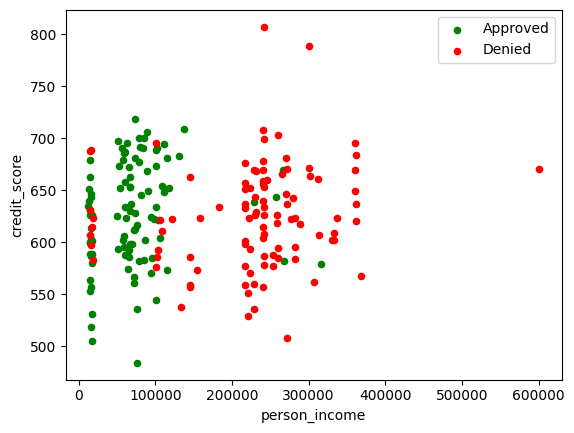

In [ ]:
#distribution of the classes

approved = df[df['loan_status']==1][0:100]
denied = df[df['loan_status']==0][0:100]

axes=approved.plot(kind='scatter', x="person_income", y="credit_score", color='green', label='Approved')
denied.plot(kind='scatter', x="person_income", y="credit_score", color='red', label='Denied',ax=axes)

In [ ]:
# Encoding categorical columns into numerical columns

df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
df['person_education'] = df['person_education'].map({'Associate': 1, 'High School': 2, 'Bachelor': 3, 'Master': 4, 'Doctorate': 5})
df['person_home_ownership'] = df['person_home_ownership'].map({'RENT': 1, 'MORTGAGE': 2, 'OWN': 3, 'OTHER': 4})
df['loan_intent'] = df['loan_intent'].map({'PERSONAL': 1, 'EDUCATION': 2, 'MEDICAL': 3, 'VENTURE': 4, 'HOMEIMPROVEMENT': 5, 'DEBTCONSOLIDATION': 6})
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0.0,1,35000.0,1,16.02,0.49,3.0,561.0,0,1
2,25.0,0,2,12438.0,3.0,2,5500.0,3,12.87,0.44,3.0,635.0,0,1
4,24.0,1,4,66135.0,1.0,1,35000.0,3,14.27,0.53,4.0,586.0,0,1
7,24.0,0,2,95550.0,5.0,1,35000.0,3,11.11,0.37,4.0,585.0,0,1
8,24.0,0,1,100684.0,3.0,1,35000.0,1,8.90,0.35,2.0,544.0,0,1


In [ ]:
df.drop_duplicates()
df.shape

(1097, 14)

In [ ]:
# check categorical and numerical columns

cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
[]
Numerical Variables:
['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']


In [ ]:
# Remove unwanted columns

df.columns
feature_df = df[['person_age', 'person_education', 'person_income', 'person_home_ownership', 'loan_amnt', 'loan_intent',
                 'loan_int_rate', 'credit_score', 'previous_loan_defaults_on_file']]
X = np.asarray(feature_df)
y = np.asarray(df['loan_status'])

X[0:3]

y[0:3]

[[2.2000e+01 4.0000e+00 7.1948e+04 ... 1.6020e+01 5.6100e+02 0.0000e+00]
 [2.5000e+01 2.0000e+00 1.2438e+04 ... 1.2870e+01 6.3500e+02 0.0000e+00]
 [2.4000e+01 4.0000e+00 6.6135e+04 ... 1.4270e+01 5.8600e+02 0.0000e+00]
 ...
 [2.3000e+01 3.0000e+00 5.7630e+04 ... 1.0620e+01 6.1500e+02 0.0000e+00]
 [2.2000e+01 1.0000e+00 5.8425e+04 ... 8.9000e+00 6.0700e+02 0.0000e+00]
 [2.5000e+01 1.0000e+00 3.0903e+04 ... 6.7600e+00 6.1100e+02 0.0000e+00]]


array([1, 1, 1])

# Implementing SVM Using Scikit-learn Library

In [ ]:
# Train/Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(877, 9) (877,)
(220, 9) (220,)


In [ ]:
# Model Implemantation using SVM

from sklearn import svm
classifier = svm.SVC(kernel='linear', C=67)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [ ]:
# Result comparison

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.8136363636363636
